<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2 (2022)</h1>

-----

|**Maximum Marks**         |**100 for COMP2420 and 120 for COMP6420 students**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **11.59M, Tuesday, May 24th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this assignment:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment_2_2022_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) [Please note that if you have to pull from the upstream repo you will need to change the name back first and add your uid after the pull again]
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them. You can change these to Markdown cells where necessary (e.g. you may need to include some figures in your answer).
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

## Introduction

This introduction has been split into three sections, based on the datasets you will be interacting with: **CVSS Data**, **BitcoinHeist**, and **Sakila**.


### CVSS Data
Sound familiar? We hope so. You are being provided with the same dataset from the assignment 1, with an additional csv file. For a refresher, go check the [about.md](./data/cvss/about.md) file. The provided files are:
- cvss_data_complete.csv
- cve_configurations_mapping.csv
- cwe_capec_mapping.csv


### BitcoinHeist
We will be using a subset of data from a UCI Machine Learning Repository [dataset](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset) that contains parsed Bitcoin transaction graphs from 2009 January to 2018 December. BitcoinHeist dataset contains address features on the heterogeneous Bitcoin network to identify ransomware payments. We will be using this dataset to predict whether a given record is white (i.e., not known to be ransomware) or not (i.e., known to be ransomware).


### Sakila
To test your SQL muscles, we have provided a database (and the creation scripts) for a sample SQL database called Sakila made available by MySQL under a BSD licence. The Sakila sample database is a fictitious database designed to represent a DVD rental store. The tables of the database include film, film_category, actor, customer, rental, payment and inventory among others.. We have provided the Database diagram in Q3 for reference.

Detailed information about the database can be found on the MySQL website: https://dev.mysql.com/doc/sakila/en/


#### In summary, you have three (3) datasets to work with in this assignment, broken down as follows:

- Question 1 & 4 - CVSS data
- Question 2 - BitcoinHeist
- Question 3 - Sakila

Once again, the CVSS dataset is a sizable dataset, so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.


****

In [1]:
# Code Imports
# Every import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import sqlite3
from sqlite3 import Error
from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn import metrics                             # metrics

In [4]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
from sklearn.model_selection import cross_validate # cross validation
import hashlib                                     # for hash encryption 


****
## Q1: Unsupervised Learning (25 marks for COMP2420, 32 marks for COMP6420)
Building off the dataset you initially encountered in Assignment 1, the CVSS dataset has made a return for the following question. Note that while the dataset holds the same schema, the last 4 columns are populated for you in this assignment.

The following question is designed to get you to load and process data, and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

Your scenario is as follows:
> Once again, you have assumed the role of a member of a cyber-security team interested in the vulnerability of products. Your procurement team has asked you to develop an unsupervised modelling system (ie: clustering model) to identify software that can be grouped based on their CVSS metrics. You must decide how many groupings (Severity Levels) are appropriate for training the model. <b>The procurement team does not wish to use the Base Scores, Sub Scores and Base Severity as clustering metrics.</b>
>
> Based on this clustering model, the procurement team will make risk-based decisions to determine whether it is safe to introduce a product to the system.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing
To start off, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/cvss/CVSS_data_complete.csv` <span style= 'float: right;'><b>[1 mark]</b></span>
2. Prepare the data for a clustering task. This time you may encounter some missing or invalid values, hence you may have to decide how to tackle these as well. 

**Note:** While not every part of this section is directly assessed, this preprocessing section includes a number of tasks that will help you in your clustering and data analysis in future questions. </font>

In [2]:
# YOUR CODE HERE
cvss_data = pd.read_csv("data/cvss/CVSS_data_complete.csv")
cvss_data.dropna(inplace = True)
cvss_data = cvss_data.drop(columns=['description','refs','ref_names','ref_sources','ref_tags'])

def Attack_Vector_n(Attack_Vector):
    if Attack_Vector == "NETWORK":
        return 0.85
    elif Attack_Vector == "ADJACENT" or Attack_Vector == "ADJACENT_NETWORK":
        return 0.62
    elif Attack_Vector == "LOCAL":
        return 0.55
    elif Attack_Vector == "PHYSICAL":
        return 0.2

def Attack_Complexity_n(Attack_Complexity):
    if Attack_Complexity == "LOW":
        return 0.77
    elif Attack_Complexity == "HIGH":
        return 0.44
    
def Privileges_Required_n(Privileges_Required, Scope):
    if Privileges_Required == "NONE":
        return 0.85
    elif Privileges_Required == "LOW" and Scope == "UNCHANGED":
        return 0.62
    elif Privileges_Required == "LOW" and Scope == "CHANGED":
        return 0.68
    elif Privileges_Required == "HIGH" and Scope == "UNCHANGED":
        return 0.27
    elif Privileges_Required == "HIGH" and Scope == "CHANGED":
        return 0.5

def User_Interaction_n(User_Interaction):
    if User_Interaction == "NONE":
        return 0.85
    elif User_Interaction == "REQUIRED":
        return 0.62

def Con_Int_Ava(x):
    if x == "HIGH":
        return 0.56
    elif x == "LOW":
        return 0.22
    elif x == "NONE":
        return 0


cvss_data['v3_attackComplexity_n'] = cvss_data['v3_attackComplexity'].apply(Attack_Complexity_n)
cvss_data['v3_attackVector_n'] = cvss_data['v3_attackVector'].apply(Attack_Vector_n)
cvss_data['v3_privilegesRequired_n'] = cvss_data.apply(lambda x: Privileges_Required_n(x['v3_privilegesRequired'], x['v3_scope']),axis=1)
cvss_data['v3_userInteraction_n'] = cvss_data['v3_userInteraction'].apply(User_Interaction_n)
cvss_data['v3_confidentialityImpact_n'] = cvss_data['v3_confidentialityImpact'].apply(Con_Int_Ava)
cvss_data['v3_integrityImpact_n'] = cvss_data['v3_integrityImpact'].apply(Con_Int_Ava)
cvss_data['v3_availabilityImpact_n'] = cvss_data['v3_availabilityImpact'].apply(Con_Int_Ava)

cvss_data

# (ANY ADDITIONAL CELLS AS REQUIRED)

,cve_id,assigner,cwe_ids,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,...,v3_baseSeverity,v3_exploitabilityScore,v3_impactScore,v3_attackComplexity_n,v3_attackVector_n,v3_privilegesRequired_n,v3_userInteraction_n,v3_confidentialityImpact_n,v3_integrityImpact_n,v3_availabilityImpact_n
0,CVE-2020-0002,security@android.com,"CWE-787,CWE-416",NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,HIGH,2.8,5.9,0.77,0.85,0.85,0.62,0.56,0.56,0.56
1,CVE-2020-0003,security@android.com,CWE-367,LOCAL,HIGH,LOW,REQUIRED,UNCHANGED,HIGH,HIGH,...,MEDIUM,0.8,5.9,0.44,0.55,0.62,0.62,0.56,0.56,0.56
2,CVE-2020-0005,security@android.com,CWE-787,LOCAL,LOW,HIGH,NONE,UNCHANGED,HIGH,HIGH,...,MEDIUM,0.8,5.9,0.77,0.55,0.27,0.85,0.56,0.56,0.56
3,CVE-2020-0006,security@android.com,CWE-908,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,MEDIUM,2.8,3.6,0.77,0.85,0.85,0.62,0.56,0.00,0.00
4,CVE-2020-0007,security@android.com,CWE-908,LOCAL,LOW,LOW,NONE,UNCHANGED,HIGH,NONE,...,MEDIUM,1.8,3.6,0.77,0.55,0.62,0.85,0.56,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,CVE-2020-9987,product-security@apple.com,CWE-1021,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,NONE,LOW,...,MEDIUM,2.8,1.4,0.77,0.85,0.85,0.62,0.00,0.22,0.00
9206,CVE-2020-9990,product-security@apple.com,CWE-367,LOCAL,HIGH,LOW,NONE,CHANGED,HIGH,HIGH,...,HIGH,1.1,6.0,0.44,0.55,0.68,0.85,0.56,0.56,0.56
9207,CVE-2020-9993,product-security@apple.com,CWE-1021,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,NONE,LOW,...,MEDIUM,2.8,1.4,0.77,0.85,0.85,0.62,0.00,0.22,0.00
9208,CVE-2020-9995,product-security@apple.com,"CWE-79,CWE-601",NETWORK,LOW,NONE,REQUIRED,CHANGED,LOW,LOW,...,MEDIUM,2.8,2.7,0.77,0.85,0.85,0.62,0.22,0.22,0.00


### 1.2 Building a Clustering Model

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **CVSS Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset by using either all or a subset of the available features (except the Base Scores, Sub Scores and Base Severity). You are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** in your model. 
<span style= 'float: right;'><b>[10 marks]</b></span>

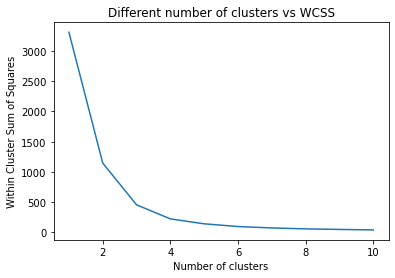

In [6]:
# YOUR CODE HERE
# Elbow Method to discover the best number of cluster
le = LabelEncoder()
cvss_data['v3_scope'] = le.fit_transform(cvss_data['v3_scope'])
X = cvss_data[['v3_scope','v3_attackComplexity_n', 'v3_attackVector_n','v3_privilegesRequired_n','v3_userInteraction_n','v3_confidentialityImpact_n','v3_integrityImpact_n','v3_availabilityImpact_n']]
pca = PCA(n_components=3)
cvss_reduced = pca.fit_transform(X)

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cvss_reduced) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares') 
plt.title('Different number of clusters vs WCSS')
plt.show()


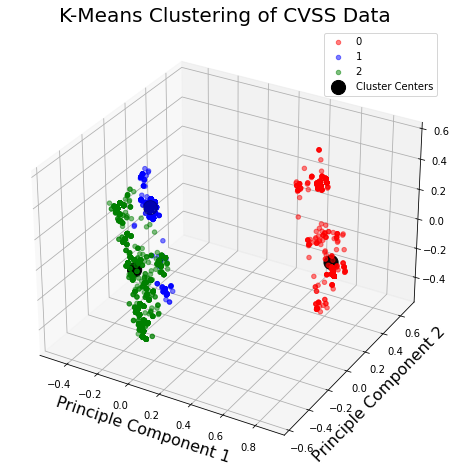

In [5]:
kmc = KMeans(n_clusters=3, random_state=0)
kmc_model = kmc.fit(cvss_reduced)
colors=["red","blue","green","purple","orange"]

# plotting with different coloured clusters and showing cluster centres
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
for i in range(np.max(kmc_model.labels_)+1):
    ax.scatter3D(cvss_reduced[kmc_model.labels_==i][:,0], cvss_reduced[kmc_model.labels_==i][:,1], cvss_reduced[kmc_model.labels_==i][:,2], label=i, c=colors[i], alpha=0.5)
    #plt.scatter(cvss_reduced[kmc_model.labels_==i][:,0], cvss_reduced[kmc_model.labels_==i][:,1], c=colors[i])
ax.scatter3D(kmc_model.cluster_centers_[:,0], kmc_model.cluster_centers_[:,1], kmc_model.cluster_centers_[:,2],label='Cluster Centers', c="black", s=200)
#plt.scatter(kmc_model.cluster_centers_[:,0], kmc_model.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means Clustering of CVSS Data",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()

# (ANY ADDITIONAL CELLS AS REQUIRED)

### 1.3 Analysing the Clusters
With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Your tasks are as follows:

#### 1.3.1 Comparison of summary statistics between clusters
1. Display and compare the mean of the CVSS Base Score, between all clusters in your model. 
2. Identify and explain the largest differences in metrics (including the mean of the CVSS Base Scores) between the clusters using a suitable summary statistic(s). (i.e. what are the defining characteristics of a cluster compared to other cluster(s)?)

<span style= 'float: right;'><b>[5 marks]</b></span>

In [32]:
# YOUR CODE HERE

for i in range(np.max(kmc_model.labels_)+1):
    baseScore = cvss_data[kmc_model.labels_==i]['v3_baseScore']
    print('CVSS data in cluster',i,'have a mean base score of', baseScore.mean())


print('other metrics:')
for i in range(np.max(kmc_model.labels_)+1):
    print('cluster',i)
    cluster = cvss_data[kmc_model.labels_==i]
    display(cluster.describe())

# (ANY ADDITIONAL CELLS AS REQUIRED)

CVSS data in cluster 0 have a mean base score of 5.9574857607811085
CVSS data in cluster 1 have a mean base score of 8.6419718309856
CVSS data in cluster 2 have a mean base score of 6.238819992483963
other metrics:
cluster 0


,v3_scope,v3_baseScore,v3_exploitabilityScore,v3_impactScore,v3_attackComplexity_n,v3_attackVector_n,v3_privilegesRequired_n,v3_userInteraction_n,v3_confidentialityImpact_n,v3_integrityImpact_n,v3_availabilityImpact_n
count,2458.0,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,0.0,5.957486,2.426851,3.017575,0.761945,0.832323,0.729963,0.640773,0.247282,0.243165,0.051595
std,0.0,1.118186,0.495699,0.945968,0.050936,0.075067,0.127601,0.065940,0.108139,0.105372,0.157515
min,0.0,2.500000,0.500000,1.400000,0.440000,0.200000,0.500000,0.620000,0.000000,0.000000,0.000000
25%,0.0,5.400000,2.300000,2.700000,0.770000,0.850000,0.680000,0.620000,0.220000,0.220000,0.000000
50%,0.0,6.100000,2.300000,2.700000,0.770000,0.850000,0.680000,0.620000,0.220000,0.220000,0.000000
75%,0.0,6.100000,2.800000,2.700000,0.770000,0.850000,0.850000,0.620000,0.220000,0.220000,0.000000
max,0.0,10.000000,3.900000,6.000000,0.770000,0.850000,0.850000,0.850000,0.560000,0.560000,0.560000


cluster 1


,v3_scope,v3_baseScore,v3_exploitabilityScore,v3_impactScore,v3_attackComplexity_n,v3_attackVector_n,v3_privilegesRequired_n,v3_userInteraction_n,v3_confidentialityImpact_n,v3_integrityImpact_n,v3_availabilityImpact_n
count,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,1.0,8.641972,2.713572,5.873880,0.751831,0.750015,0.744036,0.787332,0.554259,0.559826,0.545019
std,0.0,1.012128,1.029700,0.131643,0.075280,0.147312,0.173488,0.102416,0.055563,0.007694,0.089412
min,1.0,5.800000,0.300000,4.700000,0.440000,0.200000,0.270000,0.620000,0.000000,0.220000,0.000000
25%,1.0,7.800000,1.800000,5.900000,0.770000,0.550000,0.620000,0.620000,0.560000,0.560000,0.560000
50%,1.0,8.800000,2.800000,5.900000,0.770000,0.850000,0.850000,0.850000,0.560000,0.560000,0.560000
75%,1.0,9.800000,3.900000,5.900000,0.770000,0.850000,0.850000,0.850000,0.560000,0.560000,0.560000
max,1.0,9.800000,3.900000,5.900000,0.770000,0.850000,0.850000,0.850000,0.560000,0.560000,0.560000


cluster 2


,v3_scope,v3_baseScore,v3_exploitabilityScore,v3_impactScore,v3_attackComplexity_n,v3_attackVector_n,v3_privilegesRequired_n,v3_userInteraction_n,v3_confidentialityImpact_n,v3_integrityImpact_n,v3_availabilityImpact_n
count,2661.0,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000
mean,1.0,6.238820,2.857121,3.326193,0.752762,0.759057,0.762762,0.794337,0.247035,0.063487,0.234498
std,0.0,1.358352,1.005200,0.943777,0.073440,0.143503,0.155109,0.098528,0.256431,0.157344,0.265324
min,1.0,2.200000,0.300000,1.400000,0.440000,0.200000,0.270000,0.620000,0.000000,0.000000,0.000000
25%,1.0,5.500000,1.800000,3.600000,0.770000,0.550000,0.620000,0.850000,0.000000,0.000000,0.000000
50%,1.0,6.500000,2.800000,3.600000,0.770000,0.850000,0.850000,0.850000,0.220000,0.000000,0.000000
75%,1.0,7.500000,3.900000,3.600000,0.770000,0.850000,0.850000,0.850000,0.560000,0.000000,0.560000
max,1.0,9.100000,3.900000,5.200000,0.770000,0.850000,0.850000,0.850000,0.560000,0.560000,0.560000


#### 1.3.2 Visual exploration of the distribution of Base Scores between clusters
(a) Visualise the distribution of the CVSS Base Score between each cluster. 


(b) Answer the following: Without the use of a hypothesis test, does the CVSS Base Score appear to differ significantly between these clusters? (You may reference the previous question (a) rather than reproducing answers)

<span style= 'float: right;'><b>[4 marks]</b></span>

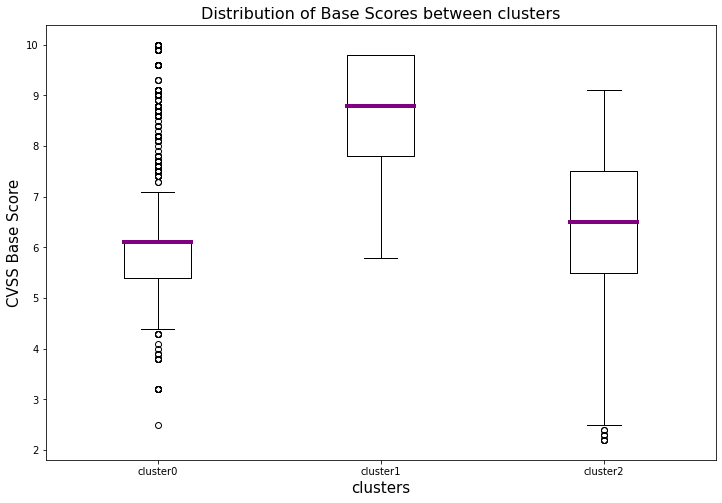

In [15]:
# YOUR CODE HERE
plt.figure(figsize=(12,8))

cluster0 = cvss_data[kmc_model.labels_==0]['v3_baseScore']
cluster1 = cvss_data[kmc_model.labels_==1]['v3_baseScore']
cluster2 = cvss_data[kmc_model.labels_==2]['v3_baseScore']

plt.boxplot([cluster0, cluster1, cluster2],medianprops={'color':'purple',"linewidth": 4})
plt.xticks([1,2,3],["cluster0", "cluster1", "cluster2"])
plt.xlabel('clusters', fontsize=15)
plt.ylabel('CVSS Base Score', fontsize=15) 
plt.title('Distribution of Base Scores between clusters', fontsize=16)
plt.show()


### 1.4 Comparing our model prediction based on Base Severity values
Do the cluster labels accurately categorise the Base Severity? Since you know the actual Base Severity classification values for this dataset, can you now compare the model predictions with the actual Base Severity values?

<b>HINT</b>: Present the Base Severity counts of the clusters found by the model like we did in Lab 06
OR plot the actual Base Severity groups and predicted clusters side by side 

<b>NOTE</b>: The number of unique Base Severity groups and the number of clusters in your trained model may be different.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [33]:
# YOUR CODE HERE
for i in range(np.max(kmc_model.labels_)+1):
    unique, counts = np.unique(cvss_data[kmc_model.labels_==i]["v3_baseSeverity"], return_counts=True)
    print('Actual Base Severity groups in cluster',i)
    print(np.asarray((unique, counts)), "\n")


# (ANY ADDITIONAL CELLS AS REQUIRED)

Actual Base Severity groups in cluster 0
[['CRITICAL' 'HIGH' 'LOW' 'MEDIUM']
 [112 138 17 2191]] 

Actual Base Severity groups in cluster 1
[['CRITICAL' 'HIGH' 'MEDIUM']
 [1400 2313 192]] 

Actual Base Severity groups in cluster 2
[['CRITICAL' 'HIGH' 'LOW' 'MEDIUM']
 [84 931 130 1516]] 



### 1.5 Convincing the Procurement Team (for COMP6420 students only)
(a) With your evidence and analysis points well defined, it is now time to present your model and findings to the procurement team. Based on your findings, do you recommend the model in its current state or not? provide your reasoning. 

(b) Explain how this model could be used when they are determining what software should be purchased. Include an example of one of more imaginary products in your explanation, and how you can use this product's features to make a prediction from your trained model.
<span style= 'float: right;'><b>[7 marks]</b></span>

In [111]:
# YOUR CODE HERE

# (ANY ADDITIONAL CELLS AS REQUIRED)

*****
## Q2: Classifciation using k-nearest neighbors and decision trees (20 marks for COMP2420, 28 marks for COMP6420)
In this question we are using a subset of data from a UCI Machine Learning Repository [dataset](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset) that contains parsed Bitcoin transaction graphs from 2009 January to 2018 December.  The BitcoinHeist dataset contains address features on the heterogeneous Bitcoin network to identify ransomware payments. The dataset contains the following features.

| Column Name    | Description    |
| :------------- | :------------- |
| address (String) | Bitcoin address |
| year (Integer) | Year |
| day (Integer) | Day of the year. 1 is the first day, 365 is the last day |
| length (Integer) | Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin. |
| weight (Float) |  Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address. |
| count (Integer) | Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount (what percent of these transactions output?) of transactions. |
| looped (Integer) | Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. Coins at this final address can then be sold and converted to flat currency. |
| neighbors (Integer) | Indicates the number of neighbors a transaction had. |
| income  (Integer) | Satoshi amount (1 bitcoin = 100 million satoshis).
| label (Category String) | Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware) |


<b>Reference</b>: BitcoinHeist: Topological Data Analysis for Ransomware Detection on the Bitcoin Blockchain. Akcora, Cuneyt Gurcan and Li, Yitao and Gel, Yulia R and Kantarcioglu, Murat. [arXiv preprint](arxiv:1906.07852). 2019

In this question, you are asked to predict whether a given record is **ransom** (i.e., known to be ransomware) or **white** (i.e., not known to be ransomware). For this purpose, we'll ask you to train two classification models (namely, k-nearest neighbors and decision trees). You are also expected to do an experiment on a range of hyperparameters for your models. Later, you will be comparing the performance of the two models.

HINT: 
- For comparing two models on the same dataset, we'll usually keep the same train-test split of the dataset. 
- You are also strongly encouraged to use cross validation to choose the hyperparameters of the two models.


### 2.1: Load and process the data
Your first task is to load and pre-process the data for the classifciation task. Remember that we are asking you to predict whether a given record is ransom (i.e., known to be ransomware).

The data to be loaded is found in `data/BitcoinHeistDataSample.csv`. 
<span style= 'float: right;'><b>[1 mark]</b></span>

In [15]:
# YOUR CODE HERE
btc_data = pd.read_csv("data/BitcoinHeistDataSample.csv")

def isransom(label):
    if label == 'white':
        return 0
    elif label != 'white':
        return 1
    
btc_data['isransom'] = btc_data['label'].apply(isransom)    
btc_data.isnull().sum()   #there is no NAN value so no need to drop anything

# (ANY ADDITIONAL CELLS AS REQUIRED)

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
isransom     0
dtype: int64

### 2.2 Data Analysis and Visualisation
 
We are interested in looking at how the volume of **ransom** and **white** data points differ across the years in this sample dataset. Your task is to come up with a suitable plot to visualise this and comment on your observations.

**NOTE**: The dataset is a sub-set of the original dataset that is not representative of the real spread between the actual labels. Hence, the conclusions we can reach based on the above plot may not hold for the full dataset, which is out of scope for this question.
<span style= 'float: right;'><b>[4 marks]</b></span>

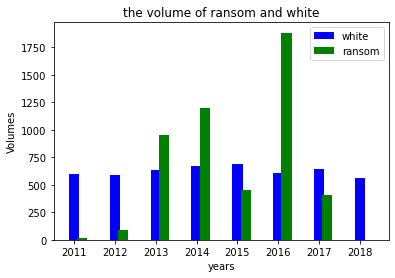

In [113]:
# YOUR CODE HERE
volume_data = {'year': [],
             'white_vol': [],
             'ransom_vol': []
            }


for year in np.unique(btc_data['year']):
    selected = btc_data[btc_data['year'] == year]
    volume_data['year'].append(year)
    volume_data['white_vol'].append(selected.loc[selected['isransom'] == 0].shape[0])
    volume_data['ransom_vol'].append(selected.loc[selected['isransom'] == 1].shape[0])

volume_df = pd.DataFrame(volume_data)

a = np.arange(8)
labels = ['white','ransom']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(a + 0.00, volume_data['white_vol'], color = 'b', width = 0.25)
ax.bar(a + 0.20, volume_data['ransom_vol'], color = 'g', width = 0.25)
ax.set_xticks(a)
ax.set_xticklabels(volume_data['year'])
ax.set_xlabel('years')
ax.set_ylabel('Volumes')
ax.set_title('the volume of ransom and white')
ax.legend(labels)

plt.show()



### 2.3: Classification using k-Nearest Neighbors
Train a KNN model using this dataset to predict whether a given record is ransom (i.e., known to be ransomware).
- How did you prepare the dataset for this task?
- How many neighbors k, did you use for your model? What are the values of the other hyperparameters of your model? 
- How did you decide on the hyper-parameters of your model? 
- Print the validation, training and testing scores for your model
<span style= 'float: right;'><b>[6 marks]</b></span>

In [16]:
# YOUR CODE HERE

X = btc_data[['length', 'weight', 'count', 'looped', 'neighbors', 'income']]
y = btc_data['isransom']

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

train_x_knn, test_x_knn, train_y_knn, test_y_knn = train_test_split(X_scaled,y,test_size = 0.2, random_state=2420)


""" 
use cross validation to select the best hyperparameters

"""

hyperparameters_dict = {'n_neighbors': range(2,15,1),
                        'leaf_size': range(28,36,2),
                        'p': [1,2] }

best_score = -1
best_parameter = {'n_neighbors': 1,
                  'leaf_size' : 30,
                  'p':1 }

for n_neighbor in hyperparameters_dict['n_neighbors']:
    for leaf_size in hyperparameters_dict['leaf_size']:
        for p_value in hyperparameters_dict['p']:
            knn = KNeighborsClassifier(n_neighbors=n_neighbor, leaf_size=leaf_size, p=p_value)
            scores = cross_validate(knn, train_x_knn, train_y_knn, cv=5 ,scoring='accuracy')['test_score']
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_parameter['n_neighbors'] = n_neighbor
                best_parameter['leaf_size'] = leaf_size
                best_parameter['p'] = p_value
                best_score = mean_score

print(f'The best KNN model parameter: {best_parameter}')
print(f'And the corresponding validation score (mean accuracy over folds): {best_score:.4f}')

knn = KNeighborsClassifier(**best_parameter)
knn_model = knn.fit(train_x_knn, train_y_knn)

train_score_knn = knn_model.score(train_x_knn, train_y_knn)
test_score_knn = knn_model.score(test_x_knn, test_y_knn)

print("Training Score:", train_score_knn)
print("Test score: ", test_score_knn)

# (ANY ADDITIONAL CELLS AS REQUIRED)

The best KNN model parameter: {'n_neighbors': 13, 'leaf_size': 28, 'p': 1}
And the corresponding validation score (mean accuracy over folds): 0.6438
Training Score: 0.7065
Test score:  0.6515


### 2.4: Classification using Decision trees
Train a Decision Tree model using this dataset to predict whether a given record is ransom (i.e., known to be ransomware).
- How did you prepare the dataset for this task?
- What are the hyperparameters of your model?
- How did you decide on the hyperparameters for your model? 
- Visualise the decision tree that you trained (display the tree in the notebook, you may optionally save this as a figure; If you save the tree as a figure, you should include the figure in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![tree.png](./img/tree.png)` where `tree.png` is the name of your figure.)
- Print the validation, training and testing scores for your model
<span style= 'float: right;'><b>[6 marks]</b></span>

In [17]:
# YOUR CODE HERE
def data_split(data):
    
    X = data[['length', 'weight', 'count', 'looped', 'neighbors', 'income']]
    y = data['isransom']
    
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state=2420)
    return train_x, test_x, train_y, test_y


train_x, test_x, train_y, test_y = data_split(btc_data)


hyperparameters_dict = {'max_depth': range(2,20,2),
                   'min_samples_split': range(2, 20, 2), 
                   'min_samples_leaf': range(2, 20, 2) }
best_score = -1
best_parameter = {'max_depth': 0,
                   'min_samples_split': 0, 
                   'min_samples_leaf': 0 }

for max_depth in hyperparameters_dict['max_depth']:
    for min_samples_split in hyperparameters_dict['min_samples_split']:
        for min_samples_leaf in hyperparameters_dict['min_samples_leaf']:
            dt = DecisionTreeClassifier(max_depth=max_depth, 
                                        min_samples_split=min_samples_split, 
                                        min_samples_leaf=min_samples_leaf)
            
            scores = cross_validate(dt, train_x, train_y, cv=5 ,scoring='accuracy', n_jobs=-1)['test_score']
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_parameter['max_depth'] = max_depth
                best_parameter['min_samples_split'] = min_samples_split
                best_parameter['min_samples_leaf'] = min_samples_leaf
                best_score = mean_score
                
print(f'The best decision tree model parameter: {best_parameter}')
print(f'And the corresponding validation score (mean accuracy over folds): {best_score:.4f}')

dt_best = DecisionTreeClassifier(**best_parameter)
dt_best_model = dt_best.fit(train_x, train_y)
print("Model Training Score:", dt_best_model.score(train_x, train_y))
print("Model Testing Score: ", dt_best_model.score(test_x, test_y))

# (ANY ADDITIONAL CELLS AS REQUIRED)

The best decision tree model parameter: {'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 16}
And the corresponding validation score (mean accuracy over folds): 0.6961
Model Training Score: 0.768875
Model Testing Score:  0.6955


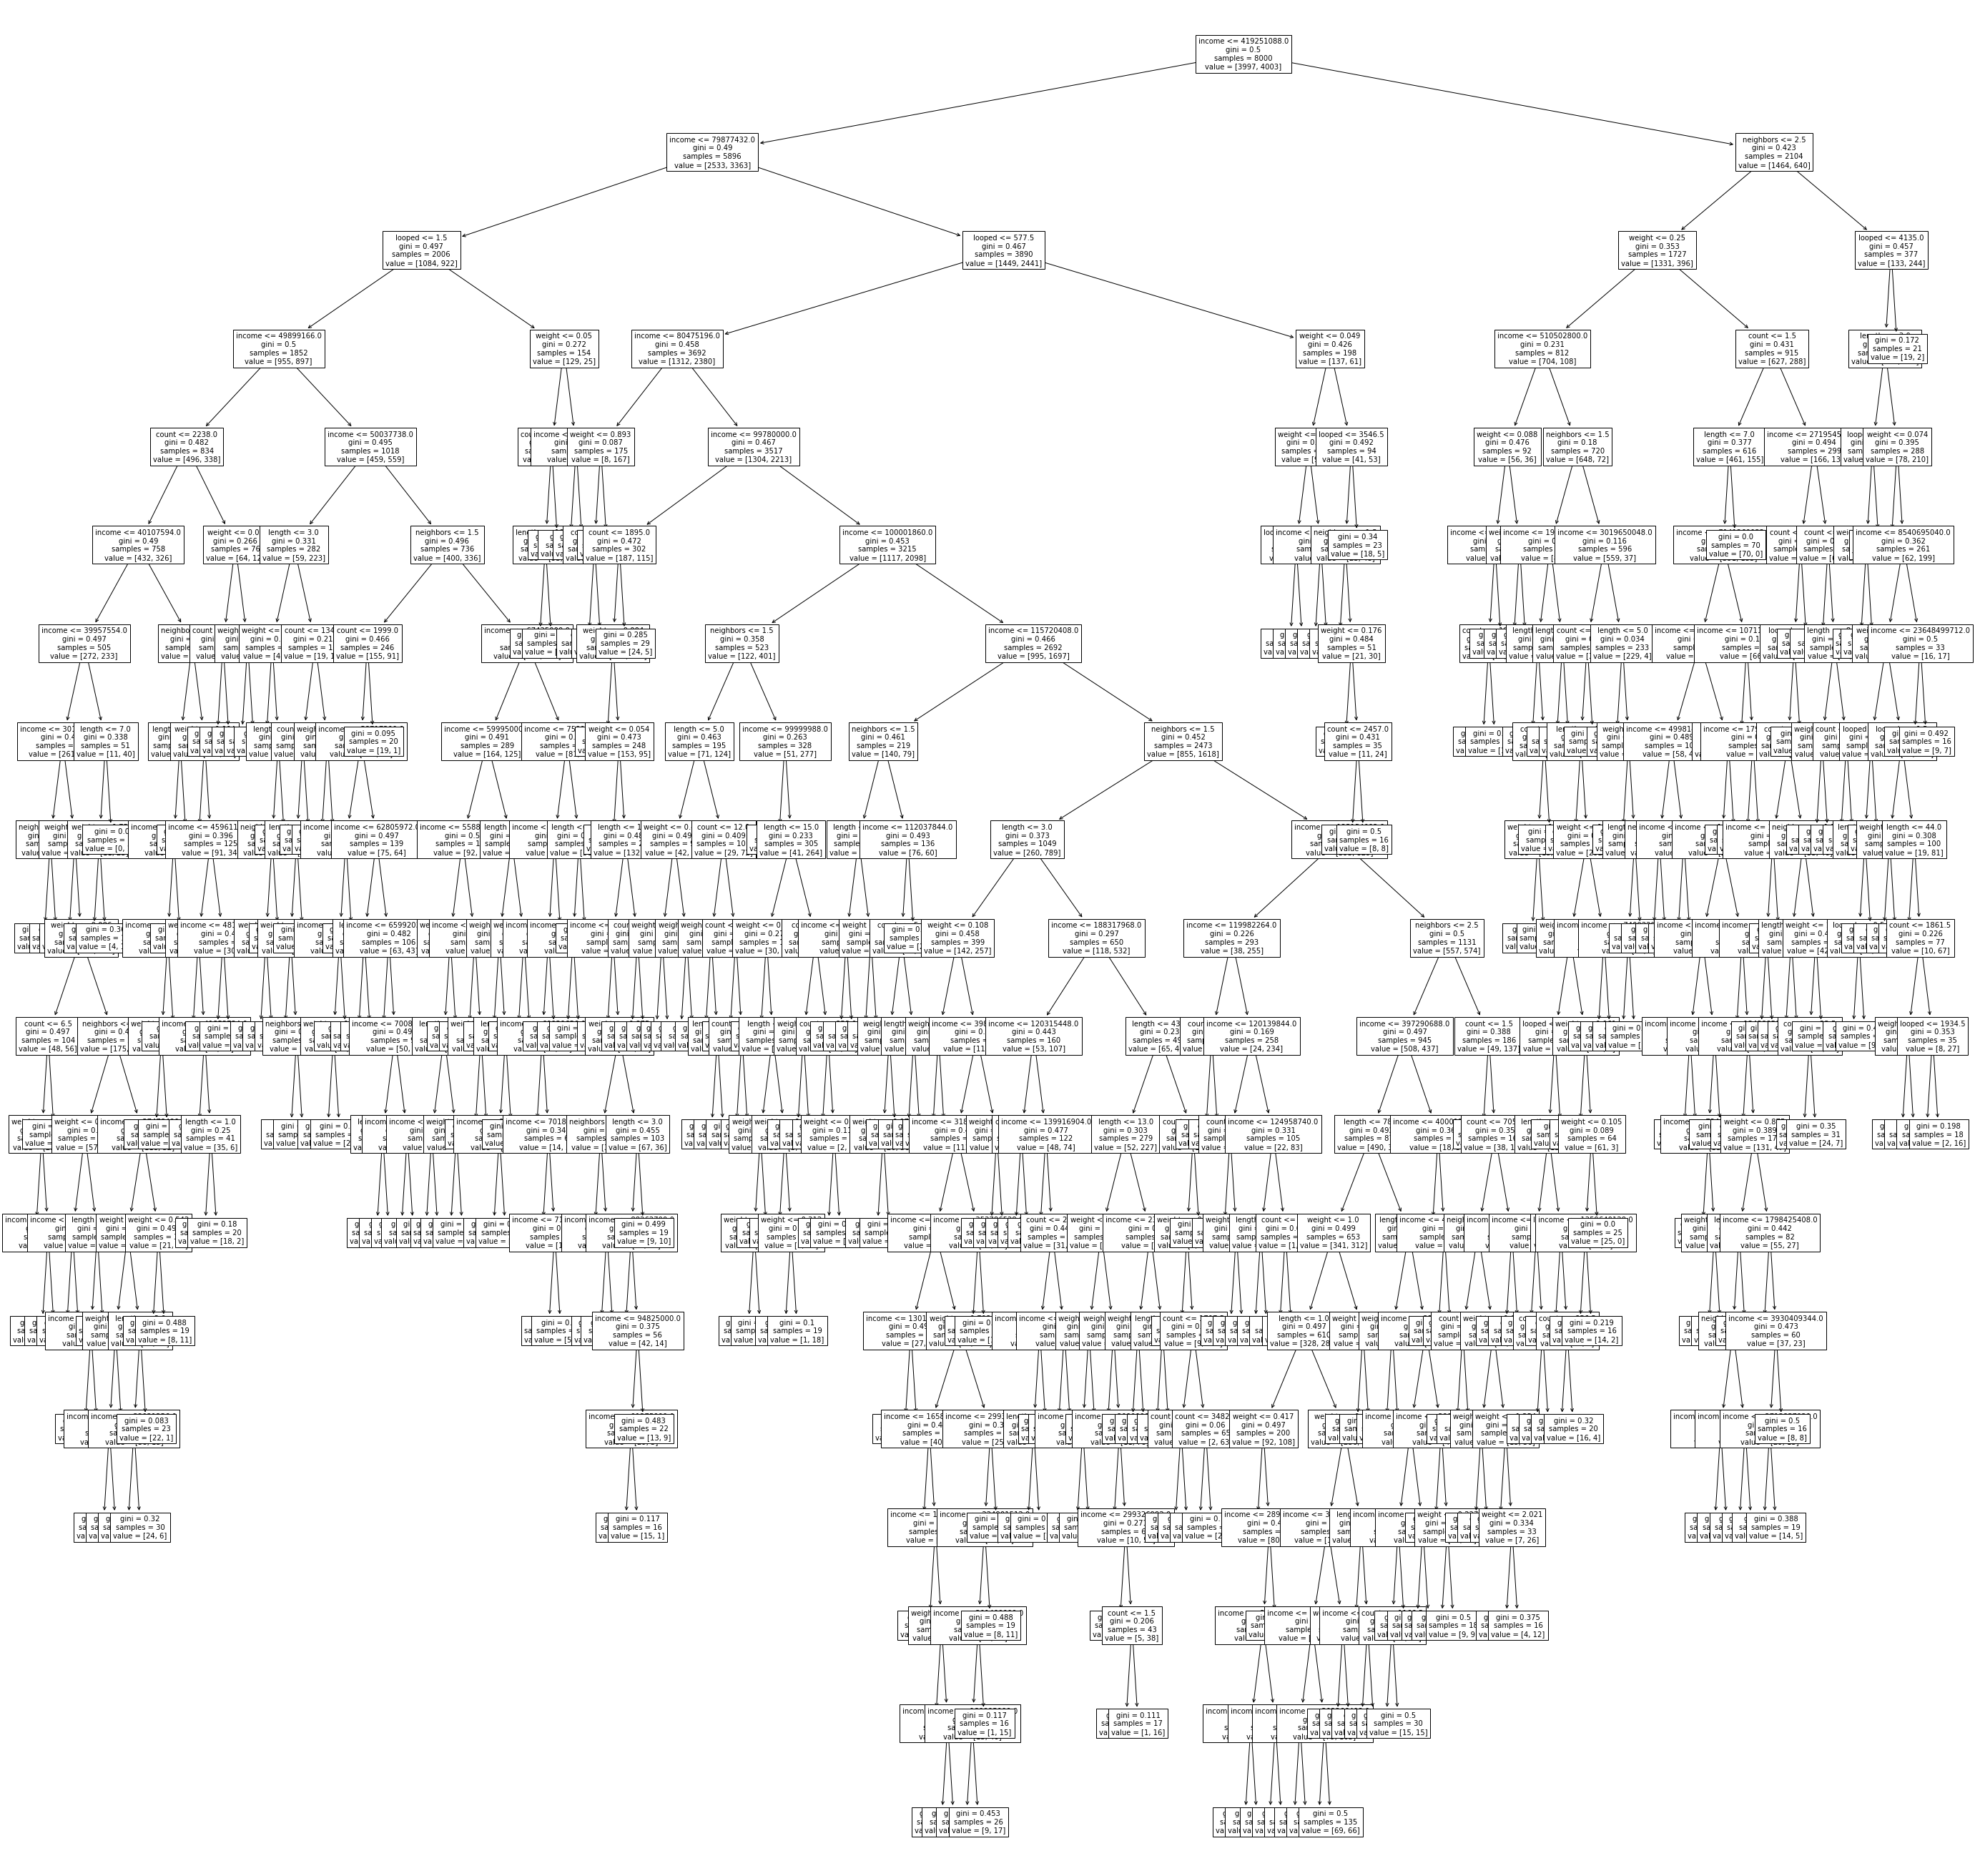

In [24]:
tree.export_graphviz(dt_best_model, "./img/tree.dot")
plt.figure(figsize=(48,48))  # set plot size (denoted in inches)
tree.plot_tree(dt_best_model, feature_names = train_x.columns,fontsize=10)
plt.plot()
plt.savefig('./img/tree.png',dpi=100)
plt.show()

### 2.5: Model comparision
Compare the performance of the two models that you trained in 2.3 and 2.4. 
- Include the Confusion Matrix, Accuracy, Precision, Recall and F1-scores in your comparision.
- Which model is better based on the metrics you obtained? 
- Discuss the performance of the two models in terms of the False Negatives and False Positives (assume that we consider False Negatives (incorrectly classifying a ransom record as white) are more harmful than False Positives (incorrectly classifying white record as ransom))
<span style= 'float: right;'><b>[3 marks]</b></span>

In [116]:
# YOUR CODE HERE
print("-----For KNN model-----")
print("Confusion_matrix: \n",confusion_matrix(test_y_knn, knn.predict(test_x_knn)))
tn, fp, fn, tp = confusion_matrix(test_y_knn, knn.predict(test_x_knn)).ravel()
recall = tp/(tp+fn)
prec = tp/(tp+fp)
acc = (tp+tn)/(tp+fp+fn+tn)
f1 = (2*recall*prec)/(recall+prec)
print("Recall:   ", recall,
    "\nPrecision:", prec,
    "\nAccuracy: ", acc,
    "\nF1 Score: ", f1)

print("-----For decision tree model-----")
print("Confusion_matrix: \n",confusion_matrix(test_y, dt_best.predict(test_x)))
tn, fp, fn, tp = confusion_matrix(test_y, dt_best.predict(test_x)).ravel()
recall = tp/(tp+fn)
prec = tp/(tp+fp)
acc = (tp+tn)/(tp+fp+fn+tn)
f1 = (2*recall*prec)/(recall+prec)
print("Recall:   ", recall,
    "\nPrecision:", prec,
    "\nAccuracy: ", acc,
    "\nF1 Score: ", f1)
# (ANY ADDITIONAL CELLS AS REQUIRED)

-----For KNN model-----
Confusion_matrix: 
 [[549 454]
 [243 754]]
Recall:    0.7562688064192578 
Precision: 0.6241721854304636 
Accuracy:  0.6515 
F1 Score:  0.6839002267573696
-----For decision tree model-----
Confusion_matrix: 
 [[727 276]
 [332 665]]
Recall:    0.6670010030090271 
Precision: 0.7066950053134963 
Accuracy:  0.696 
F1 Score:  0.6862745098039216


### 2.6: Dealing with unbalanced datasets (for COMP6420 students only)
In the original dataset, we have a larger number of **white** records than **ransom**, as expected.  To be exact, 2875284 of the 2916697 rows in the original dataset represented records not known to be ransomware. 

Briefly state how you would deal with such unbalanaced datasets in classification problems. Give at least two techniques that can be applied. You may refer techniques that can be applied to other classification models as well (i.e. you don't have to limit your answer to techniques that can be applied to k-nearest neighbors and decision trees). Don't forget to give your references.
<span style= 'float: right;'><b>[8 marks]</b></span>

*****
## Q3: Serious SQL (20 marks for COMP2420, 25 marks for COMP6420)
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the _Sakila_ database for this question. The database model is as follows:

![sakila](./img/SQLite3_Sakila_Sample_Database_ERD.png)

In the following questions, you will be asked to execute the SQL statements, and explain any reasoning as necessary. Answers to each sub-question should be obtained by a single SQL query **only**.  Data can be formatted as raw printed output or a Pandas DataFrame. 

**Note**: There may be slight discrepancies between the above figure and the loaded database.

In [35]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one;
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

sakila_db = 'data/sqlite-sakila.db'
conn = create_connection(sakila_db) 
cur = conn.cursor()
# remember to close the connection when everything is done

Connection established!


### 3.1: Names of the tables
List the names of the tables found in this database.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [36]:
# YOUR CODE HERE
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('actor',), ('country',), ('city',), ('address',), ('language',), ('category',), ('customer',), ('film',), ('film_actor',), ('film_category',), ('film_text',), ('inventory',), ('staff',), ('store',), ('payment',), ('rental',)]


### 3.2: Number of Customers
List the number of customers in the database.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [37]:
# YOUR CODE HERE
query = "SELECT COUNT(*) AS customer_num FROM customer;"
customers = pd.read_sql_query(query, conn)
display(customers)

,customer_num
0,599


### 3.3: Films with PG rating
What are the titles and descriptions of films with a PG rating?
<span style= 'float: right;'><b>[2 marks]</b></span>

In [38]:
# YOUR CODE HERE
query = "SELECT title, description FROM film WHERE rating='PG';"
films = pd.read_sql_query(query, conn)
display(films)

,title,description
0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...
1,AGENT TRUMAN,A Intrepid Panorama of a Robot And a Boy who m...
2,ALASKA PHANTOM,A Fanciful Saga of a Hunter And a Pastry Chef ...
3,ALI FOREVER,A Action-Packed Drama of a Dentist And a Croco...
4,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...
...,...,...
189,WIZARD COLDBLOODED,A Lacklusture Display of a Robot And a Girl wh...
190,WON DARES,A Unbelieveable Documentary of a Teacher And a...
191,WONDERLAND CHRISTMAS,A Awe-Inspiring Character Study of a Waitress ...
192,WORDS HUNTER,A Action-Packed Reflection of a Composer And a...


### 3.4: Films by category
What are the counts of films for each category in the database? Display the category names with the number of films in each category.
<span style= 'float: right;'><b>[4 marks]</b></span>

In [39]:
# YOUR CODE HERE
query = "SELECT name, count(*) AS number FROM film_category, category WHERE film_category.category_id=category.category_id GROUP BY film_category.category_id  ;"
film_cat = pd.read_sql_query(query, conn)
display(film_cat)

,name,number
0,Action,64
1,Animation,66
2,Children,60
3,Classics,57
4,Comedy,58
5,Documentary,68
6,Drama,62
7,Family,69
8,Foreign,73
9,Games,61


### 3.5: Most rented
Find the details of the top film in the database as measured by the most number of rentals.
<span style= 'float: right;'><b>[4 marks]</b></span>

In [40]:
# YOUR CODE HERE
query = "SELECT film_id, count(*) AS rental_num FROM rental JOIN inventory ON rental.inventory_id=inventory.inventory_id GROUP BY film_id ORDER BY count(*) DESC LIMIT 1 ;"
most_rented = pd.read_sql_query(query, conn)
display(most_rented)

,film_id,rental_num
0,103,34


### 3.6: Not returned rentals
Find out how many rentals have not yet been returned.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [150]:
# YOUR CODE HERE
query = "SELECT count(*) AS not_returned_rentals FROM rental WHERE return_date is NULL;"
not_returned = pd.read_sql_query(query, conn)
display(not_returned)

,not_returned_rentals
0,183


### 3.7: Finding a customer
List the film titles that the customer _BARBARA JONES_ has rented. 

<span style= 'float: right;'><b>[4 marks]</b></span>

In [41]:
# YOUR CODE HERE
query = "SELECT title FROM rental JOIN customer JOIN inventory JOIN film WHERE rental.inventory_id=inventory.inventory_id AND rental.customer_id=customer.customer_id AND inventory.film_id=film.film_id AND first_name='BARBARA' AND last_name='JONES';"
barbara_rented = pd.read_sql_query(query, conn)
display(barbara_rented)

,title
0,DOGMA FAMILY
1,BEDAZZLED MARRIED
2,ARTIST COLDBLOODED
3,AMADEUS HOLY
4,MAGIC MALLRATS
5,IDAHO LOVE
6,WARDROBE PHANTOM
7,SHANGHAI TYCOON
8,ARACHNOPHOBIA ROLLERCOASTER
9,TOMORROW HUSTLER


### 3.8: Top customers (for COMP6420 students only)
Find the customers who have rented more than 40 DVDs and the total amount paid by these customers.
List the _first_name_, _last_name_ of thsese customers, along with the total number of DVDs rented and total amount paid by these customers. 

Rename the returned columns as First_Name, Last_Name, Orders and Total_Price respectively.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [18]:
# YOUR CODE HERE


*****
## Q4: Database Design (15 marks)

You task is to design and implement a relational database for the data that we encountered in the Assignment 1 and in Question 1 of this assignment. For a refresher on the data and more information on the schema descriptions, go check the [about.md](./data/cvss/about.md) file.

### 4.1 With considering normalisation, design a database to match the CVSS dataset provided in the assignment. 
Draw a simple ER diagram showing the relationship between the 3 tables that has been provided to you. 
- cvss_data_complete.csv
- cve_configurations_mapping.csv
- cwe_capec_mapping.csv

__Note:__  Remember to state all assumptions beforehand. 

__Note 2:__ Diagrams can be drawn by hand and scanned/photographed, or you can use a tool such as [draw.io](https://draw.io). You should include the diagram in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![er.png](./img/er.png)` where `er.png` is the name of your ER diagram file.
<span style= 'float: right;'><b>[7 marks]</b></span>


![er.png](./img/er.png)


### 4.2 Evaluate the design of your database with respect to the normalisation considerations. 
<span style= 'float: right;'><b>[3 marks]</b></span>

### 4.3 Implement the database in an SQLite database 
Create the database with the tables you designed above. (You are not required to fill in the tables with the data from the files.)
<span style= 'float: right;'><b>[5 marks]</b></span>

In [12]:
# YOUR CODE HERE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one;
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

cvss_db = 'data/cvss_db.db'
conn = create_connection(cvss_db) 

def execute_sql(conn, sql_command):
    try:
        cur = conn.cursor()
        cur.execute(sql_command)
        print(f"Successfully executed the following SQL command: \n \n{sql_command} \n")
    except Error as e:
        print(e)

Connection established!


In [13]:
create_CVSStable_query = """CREATE TABLE CVSS (
    cve_id varchar(255) PRIMARY KEY,
    assigner varchar(255),
    description varchar(255),
    attackVector varchar(20),
    attackComplexity varchar(20),
    privilegesRequired varchar(20),
    userInteraction varchar(20),
    scope  varchar(20),
    confidentialityImpact varchar(20),
    integrityImpact varchar(20),
    availabiltyImpact varchar(20),
    baseScore varchar(20),
    baseSeverity,
    exploitabilityScore float,
    impactScore float
);"""

execute_sql(conn, create_CVSStable_query)

create_CVEtable_query = """CREATE TABLE CVE (
    record_id varchar(255) PRIMARY KEY,
    cve_id varchar(255),
    vendor varchar(255),
    product_name varchar(255),
    version varchar(255),
    FOREIGN KEY(cve_id) REFERENCES CVSS(cve_id)
);"""

execute_sql(conn, create_CVEtable_query)

create_CWE_query = """CREATE TABLE CWE (
    cve_id varchar(255),
    cwe_id varchar(255),
    FOREIGN KEY(cve_id) REFERENCES CVSS(cve_id),
    PRIMARY KEY(cve_id,cwe_id)
);"""

execute_sql(conn, create_CWE_query)


create_CAPCE_query = """CREATE TABLE CAPCE (
    cwe_id varchar(255),
    capces_id varchar(255),
    PRIMARY KEY(cwe_id,capces_id)
);"""

execute_sql(conn, create_CAPCE_query)

create_REFtable_query = """CREATE TABLE Refs (
    ref_id varchar(255) PRIMARY KEY,
    url varchar(255),
    sources varchar(255),
    tags varchar(255)
);"""

execute_sql(conn, create_REFtable_query)

create_CWEandRefs_query = """CREATE TABLE CWEandRefs (
    cve_id varchar(255),
    ref_id varchar(255),
    FOREIGN KEY(cve_id) REFERENCES CVSS(cve_id),
    FOREIGN KEY(ref_id) REFERENCES Refs(ref_id),
    PRIMARY KEY(cve_id,ref_id)
);"""

execute_sql(conn, create_CWEandRefs_query)

Successfully executed the following SQL command: 
 
CREATE TABLE CVSS (
    cve_id varchar(255) PRIMARY KEY,
    assigner varchar(255),
    description varchar(255),
    attackVector varchar(20),
    attackComplexity varchar(20),
    privilegesRequired varchar(20),
    userInteraction varchar(20),
    scope  varchar(20),
    confidentialityImpact varchar(20),
    integrityImpact varchar(20),
    availabiltyImpact varchar(20),
    baseScore varchar(20),
    baseSeverity,
    exploitabilityScore float,
    impactScore float
); 

Successfully executed the following SQL command: 
 
CREATE TABLE CVE (
    record_id varchar(255) PRIMARY KEY,
    cve_id varchar(255),
    vendor varchar(255),
    product_name varchar(255),
    version varchar(255),
    FOREIGN KEY(cve_id) REFERENCES CVSS(cve_id)
); 

Successfully executed the following SQL command: 
 
CREATE TABLE CWE (
    cve_id varchar(255),
    cwe_id varchar(255),
    FOREIGN KEY(cve_id) REFERENCES CVSS(cve_id),
    PRIMARY KEY(cve_id,cwe

*****
## Q5: Data Ethics and Data Security (20 marks)

Many people use the social media platform Facebook daily to keep in touch with friends and family.  Currently, Facebook is by far the most used social media platform (see [statistics by Data reportal](https://datareportal.com/reports/digital-2022-future-of-facebook)). 

The Facebook news feed is normally what users rely on to keep track of what is happening within their social network,  catching up with status updates, messages, videos and photos that their connections post.  The Facebook news feed is a curated list presented to users using various algorithms to determine what best to present.  Most users barely even think about how items in their news feed get picked.

For one week in January 2012, a group of data scientists from Facebook and Cornell University manipulated the newsfeed of selected Facebook users without their knowledge:
- one group of users were shown a greater proportion of positive content on their newsfeed.
- another group of users were shown a greater proportion of negative content on their newsfeed.
    
This was done as part of a research experiment to investigate _"whether emotional states can be transferred to others via emotional contagion,leading people to experience the same emotions without their awareness"_ [\[1\]](https://www.pnas.org/doi/10.1073/pnas.1320040111).  The results were even published in a reputable [journal article](https://www.pnas.org/doi/10.1073/pnas.1320040111).  The results showed that the group of users who were shown a greater proportion of positive content tended to post more positive content themselves whereas the group of users who were shown a greater proportion of negative content tended to post more negative content themselves.  In other words, they demonstrated _"emotional contagion"_.

While many previous studies have used Facebook to examine _"emotional contagion"_, this particular experiment just described is different because it did not just involve observing Facebook users behaviour, it actually manipulated this behaviour through curating users' news feed in a particular manner and did so without asking them first.

**Was this experiment legal?**

Facebook's terms of service states that _"users relinquish the use of their data for 'data analysis testing and research."_

Facebook also released the following statement _"This research was conducted for a single week in 2012 and none of the data used was associated with a specific person’s Facebook account. We do research to improve our services and to make the content people see on Facebook as relevant and engaging as possible. A big part of this is understanding how people respond to different types of content, whether it’s positive or negative in tone, news from friends, or information from pages they follow. We carefully consider what research we do and have a strong internal review process. There is no unnecessary collection of people’s data in connection with these research initiatives and all data is stored securely."_

Much has been written about this experiment, a example opinion pieces are given here:

Robinson Meyer (2014), ['Everything We Know About Facebook's Secret Mood-Manipulation Experiment'](https://www.theatlantic.com/technology/archive/2014/06/everything-we-know-about-facebooks-secret-mood-manipulation-experiment/373648/)

Michelle Meyer (2014), ['Everything You Need to Know About Facebook's Controversial Emotion Experiment'](https://www.wired.com/2014/06/everything-you-need-to-know-about-facebooks-manipulative-experiment/)

### 5.1: Company perspective 
As a company executive working for Facebook, do you think this experiment was a good thing? Discuss your reasons.
<span style= 'float: right;'><b>[3 marks]</b></span>


### 5.2: User perspective 
As a Facebook user, do you think this experiment was a good thing? Discuss your reasons.
<span style= 'float: right;'><b>[3 marks]</b></span>



### 5.3: Was the research ethical? 
Discuss both the legal and ethical aspects of the research.  (What ethical considerations should the data scientists have taken into account?  Given the legal terms specified, was the experiment reasonable and justified? Make sure to substantiate your presented arguments.)
<span style= 'float: right;'><b>[4 marks]</b></span>

### 5.4: Responsibilties of data scientists

What ethical responsibilities do data scientists have when carrying out their job? Why are those ethical responsibilities important?  Discuss in relation to the facebook experiment described.
<span style= 'float: right;'><b>[3 marks]</b></span>

### 5.5: Data Security
Reading about this experiment has now made you think about your data on Facebook.  You are now wondering not only about what the good folks at Facebook could be doing to manipulate your news feed, but also about preserving the security of your data and the various vulnerabilities that could be exploited to access and misuse your data.  

For the following activities, please assess the security risk and reflect on possible consequences:

**5.5.1: Your friends send you a lot of facebook quizzes (such as "Which Superhero are you?" or "Which Disney Princess are you?"**

If any, what are the security risks involved in posting your answers to those quizzes and how can you mitigate against them?
<span style= 'float: right;'><b>[2 marks]</b></span>

**5.5.2: This good-looking person sent you a friend's request, and you feel conflicted about whether to accept or reject it.**

If any, what are the security risks involved in accepting this request and what could be possible consequences?
<span style= 'float: right;'><b>[2 marks]</b></span>

### 5.6: Getting under the hood with data privacy and security
You bought something from that quirky clothing store and now suddenly you are noticing their ads on Facebook.  You did sign up for their loyalty program, who would say no to 5% off! So, did they share your contact information with Facebook? How does Facebook know you like that particular store when you have not posted about going there? (you did not want your Mum to find out you bought those clothes yet.)  It turns out that businesses can target customers already on their list through Facebook but your contact details are not directly shared.  To ensure your privacy, Facebook hashes the list of contacts that a particular business uploads for advertising before it gets used.  Facebook hashes contact information it already has of its own users before comparing with the hashed list from the business to see if there is a match.  (https://www.facebook.com/help/597339877966751)

**5.6.1: Hashing**
<br>Suppose your email address is punk_rocker@email.com  
[This article](https://3qdigital.com/wp-content/uploads/2016/06/facebook_audiences_data_security_overview.pdf ) suggests that Facebook uses the SHA-256 hashing algorithm. What would the hashed fingerprint of your email address be?  

<span style= 'float: right;'><b>[2 marks]</b></span>

In [4]:
# YOUR CODE HERE
sha256_string = hashlib.sha256(b'punk_rocker@email.com')
print(sha256_string.hexdigest())

0f46c219c69d85c45e15e9a091f5d7dcde6279659e8361b5e4682464cd46b8e3


**5.6.2: Reflection**
<br>Reflect on how it makes you feel about getting targeted in this manner by a business you gave your details to?
You can consider human, ethics, privacy and security aspects (but you are welcome to raise additional points) in your reflection.
<span style= 'float: right;'><b>[1 mark]</b></span>